In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('iris.csv')
X = df.drop('class', axis=1)
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create base models
log = LogisticRegression()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()

# Voting Classifier (Ensemble)
voting = VotingClassifier(estimators=[
    ('lr', log), 
    ('svc', svc), 
    ('dt', dt)], voting='soft')

# Train and evaluate
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



0.9111111111111111 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.83      0.94      0.88        16

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



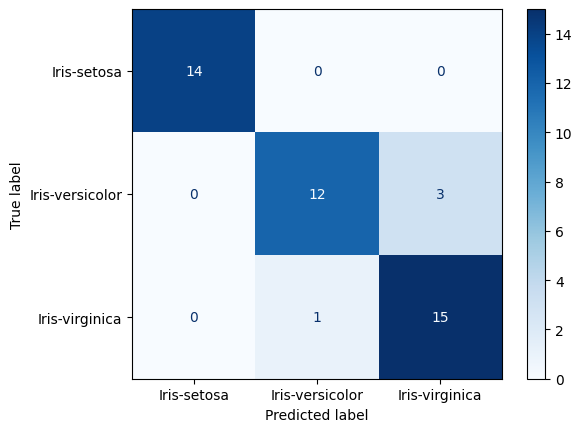

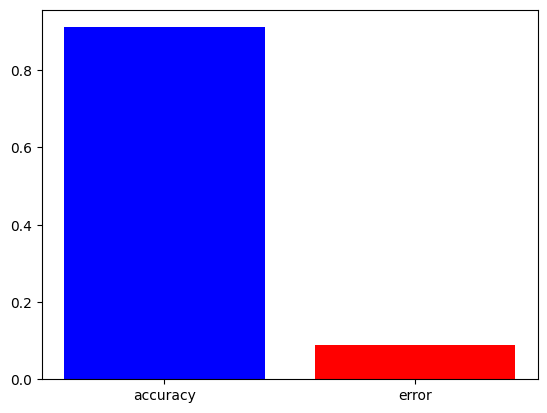

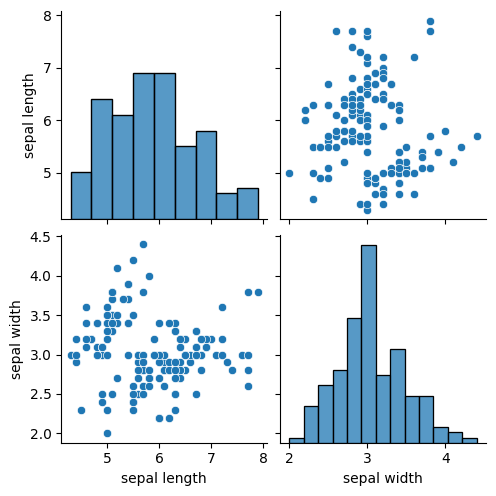

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

df=pd.read_csv('iris.csv')
x=df.drop('class',axis=1)
y=df['class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
m1=LogisticRegression(max_iter=200)
m2=SVC(probability=True)
m3=DecisionTreeClassifier()

m4=VotingClassifier(estimators=[('logistic',m1),('svm',m2),('dt',m3)],voting='soft')
m4.fit(x_train,y_train)
y_pred=m4.predict(x_test)

acc=accuracy_score(y_test,y_pred)
error=1-acc
print(acc,'\n',classification_report(y_test,y_pred))
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=m4.classes_)
disp.plot(cmap='Blues')
plt.show()

plt.bar(['accuracy','error'],[acc,error],color=['blue','red'])

sns.pairplot(df[['sepal length','sepal width','class']])
